# **Proyecto Orange** 
### **Responsables: Andrés Felipe Ocampo, Alejandra Ruiz y Luis Felipe Montenegro**

# **Sección 1 - Análisis Exploratorio de Datos**

Caracterización de los registros existentes en la base de datos, con el objetivo de aterrizar el dominio del problema. Para esto es necesario:

- Diseño y estructuración de la base de datos
- Generación de gráficos, análisis descriptivo y estadística inferencial (deseable)
- Análisis de correlación univariada
  

In [68]:
#Librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
#Lectura de datos


df = pd.read_excel('prueba.xlsx', header=8)
pd.set_option('display.max_columns', None)


In [13]:
# Leer encabezados de dimensiones (desde fila 3 a 8)

#Se leen los encabezados de las dimensiones de la encuesta, las cuales se encuentran entre la fila 3 y la 8

df_headers = pd.read_excel('prueba.xlsx', header=None, nrows=8)
dimension_metadata = df_headers.iloc[2:8, :].transpose()
dimension_metadata.columns = ['Dynamic_Capability_Stage', 'Columna_Validar_1', 'Business_Parameters', 'Business_Sub_Parameters', 'Columna_Validar_2', 'Variable_Metrics']


#Se identifica la columna en la que se encuentran las preguntas. 

dimension_metadata_filtered = dimension_metadata.iloc[27:].reset_index(drop=True)
question_columns = df.columns[27:]

# Construir tabla de metadatos

metadata_df = pd.DataFrame({
    'Pregunta_Columna': question_columns
})
metadata_df = pd.concat([metadata_df, dimension_metadata_filtered.reset_index(drop=True)], axis=1)

# Melt Data 

id_vars = df.columns[:27]
value_vars = df.columns[27:]

df_melted = df.melt(id_vars=id_vars, value_vars=value_vars,
                    var_name='Pregunta_Columna', value_name='Respuesta')

# Unir con metadatos

df_final = df_melted.merge(metadata_df, on='Pregunta_Columna', how='left')

# Mostrar la información

print(df_final.head())

  Company  Unnamed: 1 LT \nLeader of Team)\n \nor\n \nTM \n(Team Member)  \
0     C01           1                                                 LT   
1     C01           1                                                 TM   
2     C02           2                                                 LT   
3     C02           2                                                 TM   
4     C03           3                                                 LT   

     CODE Industry            1 industry/sector: 2 company size  \
0  C01-LT   Manufa             Manufactura, Moda            Big   
1  C01-TM   Manufa             Manufactura, Moda            Big   
2  C02-LT   Servic  Servicios, Comidas y bebidas            Big   
3  C02-TM   Servic  Servicios, Comidas y bebidas            Big   
4  C03-LT   Manufa             Manufactura, Moda            Big   

   3 Age of the company: Age of the company (segment)  \
0                     29                    25+ years   
1                     29  

In [14]:
df_transformado = df_final.copy()


In [15]:
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13776 entries, 0 to 13775
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Company                                        13776 non-null  object 
 1   Unnamed: 1                                     13776 non-null  int64  
 2   LT 
Leader of Team)
 
or
 
TM 
(Team Member)   13776 non-null  object 
 3   CODE                                           13776 non-null  object 
 4   Industry                                       13776 non-null  object 
 5   1 industry/sector:                             13776 non-null  object 
 6   2 company size                                 13776 non-null  object 
 7   3 Age of the company:                          13776 non-null  int64  
 8   Age of the company (segment)                   13776 non-null  object 
 9   4 Geographic reach location:                   137

# Análisis Univariado

### Transformación del dataset

In [ ]:
# Copia de dataset
df_univariado=df.copy()

# Eliminar duplicados en Company
df_univariado  = df_univariado.drop_duplicates(subset=['Company'])

# Elegir columnas a analizar (5 a la 15)
df_univariado = df_univariado.iloc[:, 5:15]
df_univariado.columns

# Dividir la columna 'industry_sector' en dos nuevas columnas: 'industry' y 'sector'
df_univariado[['industry', 'sector']] = df_univariado['1 industry/sector:'].str.split(', ', n=1, expand=True)

# Cambio de rtipo de variable de Sales
df_univariado['6 new products sales:'] = df_univariado['6 new products sales:'].astype(str).str.replace('.', '', regex=False)
df_univariado['6 new products sales:'] = (
    df_univariado['6 new products sales:']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)
df_univariado

df_univariado.head(5)

,1 industry/sector:,2 company size,3 Age of the company:,Age of the company (segment),4 Geographic reach location:,5 R&D Expenditure (Research and Development):,6 new products sales:,7 Number of patents/innovations:,8 Annual growth:,9 Last Year Sales,industry,sector
0,"Manufactura, Moda",Big,29,25+ years,Regional,2.000000e-02,17850000000,12,0.18,85000000000,Manufactura,Moda
2,"Servicios, Comidas y bebidas",Big,6,5-8 years,National,1.037000e+09,2835000000,8,0.24,94500000000,Servicios,Comidas y bebidas
4,"Manufactura, Moda",Big,8,5-8 years,Local,0.000000e+00,13200000000,4,0.10,110000000000,Manufactura,Moda
6,"Servicios, Transporte y logística",Medium,23,15-25 years,International,1.200000e+09,4800000000,6,0.15,13450000000,Servicios,Transporte y logística
8,"Servicios, Tecnología",Medium,25,15-25 years,National,9.625000e+08,3850000000,4,0.08,19250000000,Servicios,Tecnología


### Industry

In [41]:
df_univariado['industry'].describe()

count              28
unique              3
top       Manufactura
freq               14
Name: industry, dtype: object

In [57]:
tabla_freq=(pd.crosstab(index=df_univariado["industry"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,industry,Freq. Abs.,Freq. Rel.
0,Manufactura,14,0.500000
1,Servicios,8,0.285714
2,Comercio,6,0.214286


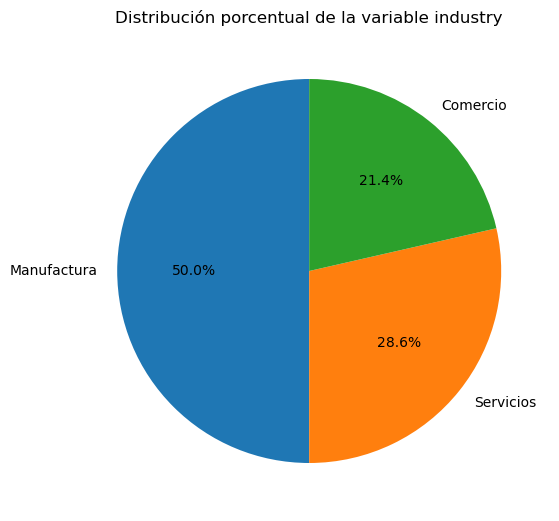

In [ ]:
fig_torta = plt.figure() 
ax = fig_torta.add_axes([0,0,1,1])
plt.pie(tabla_freq["Freq. Rel."], labels=tabla_freq["industry"],autopct='%1.1f%%',startangle=90)
plt.title("Distribución porcentual de la variable industry", fontweight='bold')
plt.show()

### Sector

In [59]:
df_univariado['sector'].describe()

count       28
unique      16
top       Moda
freq         8
Name: sector, dtype: object

In [60]:
tabla_freq=(pd.crosstab(index=df_univariado["sector"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,sector,Freq. Abs.,Freq. Rel.
0,Moda,8,0.285714
1,Construcción,4,0.142857
2,Comidas y bebidas,2,0.071429
3,Educación,2,0.071429
4,Automotor,1,0.035714
5,Belleza y cuidado personal,1,0.035714
6,Deportes,1,0.035714
7,Empaques,1,0.035714
8,Energía,1,0.035714
9,Ferroelectrico,1,0.035714


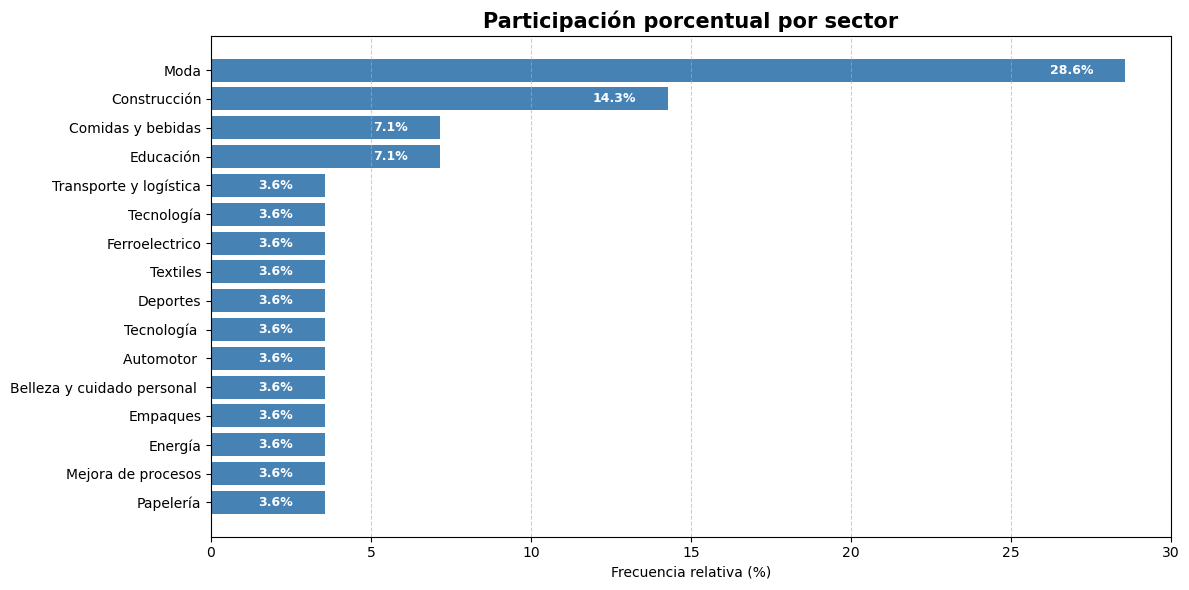

In [71]:
# Recalcular sector_freq_sorted por si se perdió en el contexto
sector_freq = df_univariado['sector'].value_counts().reset_index()
sector_freq.columns = ['sector', 'frecuencia_absoluta']
sector_freq['frecuencia_relativa'] = sector_freq['frecuencia_absoluta'] / sector_freq['frecuencia_absoluta'].sum()
sector_freq_sorted = sector_freq.sort_values(by="frecuencia_relativa", ascending=False)

# Crear el gráfico de barras con etiquetas al extremo derecho y en color blanco
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(
    sector_freq_sorted["sector"],
    sector_freq_sorted["frecuencia_relativa"] * 100,
    color="#4682B4"
)

# Añadir etiquetas en blanco al final de cada barra
for bar in bars:
    width = bar.get_width()
    ax.text(width - 1, bar.get_y() + bar.get_height() / 2,
            f"{width:.1f}%", va='center', ha='right', color='white', fontsize=9, fontweight='bold')

# Configuración estética
ax.set_xlabel("Frecuencia relativa (%)")
ax.set_title("Participación porcentual por sector", fontsize=15, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Age de la empresa

In [73]:
df_univariado['3 Age of the company:'].describe()

count    28.000000
mean     19.142857
std      12.270755
min       5.000000
25%       7.750000
50%      17.500000
75%      25.500000
max      47.000000
Name: 3 Age of the company:, dtype: float64

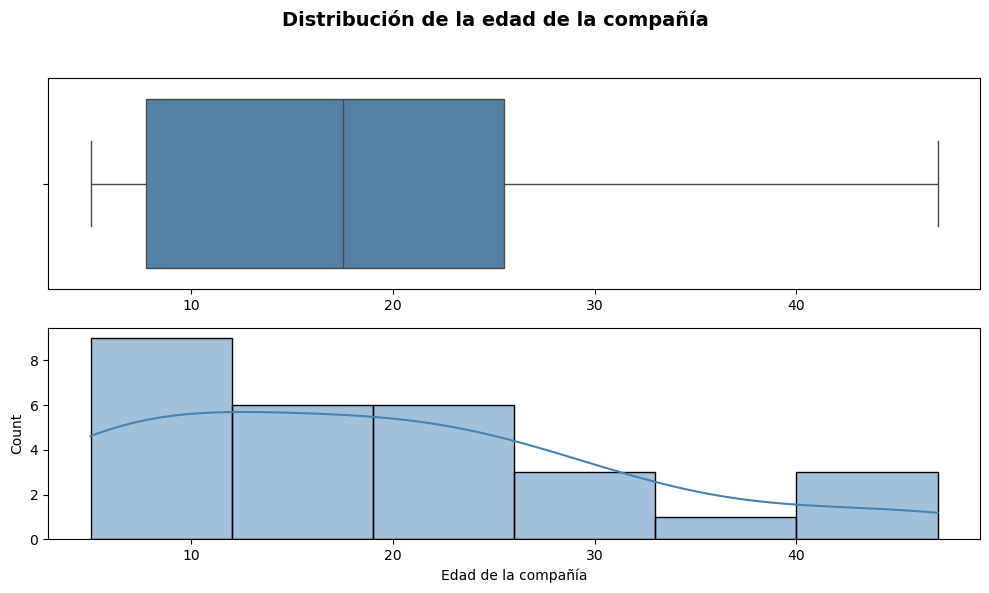

In [ ]:
# Crear figura con dos subgráficos (uno para boxplot y otro para histograma)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.suptitle("Distribución de la edad de la compañía",
             fontsize=14, fontweight='bold')

# Boxplot
sns.boxplot(x=df_univariado['3 Age of the company:'], color="steelblue", ax=axs[0])
axs[0].set_xlabel("")
#axs[0].set_title("Boxplot")

# Histograma con KDE
sns.histplot(df_univariado['3 Age of the company:'], kde=True, color="steelblue", ax=axs[1])
axs[1].set_xlabel("Edad de la compañía")
#axs[1].set_title("Histograma con KDE")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el título principal
plt.show()

### Age of the company (segment)

In [82]:
df_univariado['Age of the company (segment)'].value_counts()

Age of the company (segment)
15-25 years    10
25+ years       8
5-8 years       8
8-15 years      2
Name: count, dtype: int64

In [83]:
df_univariado['Age of the company (segment)'].describe()

count              28
unique              4
top       15-25 years
freq               10
Name: Age of the company (segment), dtype: object

In [84]:
tabla_freq=(pd.crosstab(index=df_univariado["Age of the company (segment)"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,Age of the company (segment),Freq. Abs.,Freq. Rel.
0,15-25 years,10,0.357143
1,25+ years,8,0.285714
2,5-8 years,8,0.285714
3,8-15 years,2,0.071429


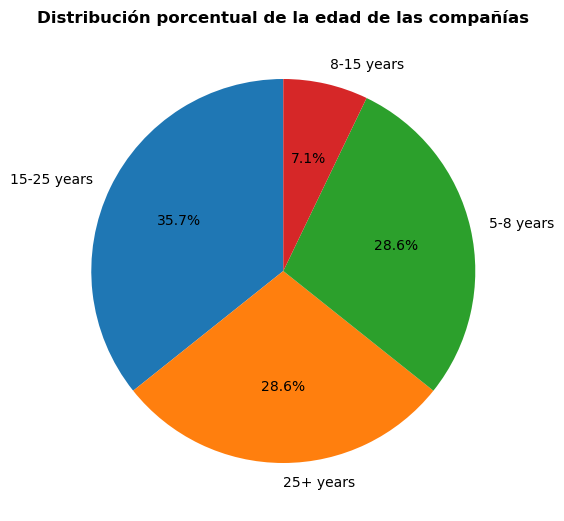

In [86]:
fig_torta = plt.figure() 
ax = fig_torta.add_axes([0,0,1,1])
plt.pie(tabla_freq["Freq. Rel."], labels=tabla_freq["Age of the company (segment)"],autopct='%1.1f%%',startangle=90)
plt.title("Distribución porcentual de la edad de las compañías", fontweight='bold')
plt.show()

### Ubicación geográfica de la compañía

In [90]:
df_univariado['4 Geographic reach location:'].describe()

count        28
unique        4
top       Local
freq         14
Name: 4 Geographic reach location:, dtype: object

In [91]:
tabla_freq=(pd.crosstab(index=df_univariado["4 Geographic reach location:"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,4 Geographic reach location:,Freq. Abs.,Freq. Rel.
0,Local,14,0.500000
1,National,9,0.321429
2,International,3,0.107143
3,Regional,2,0.071429


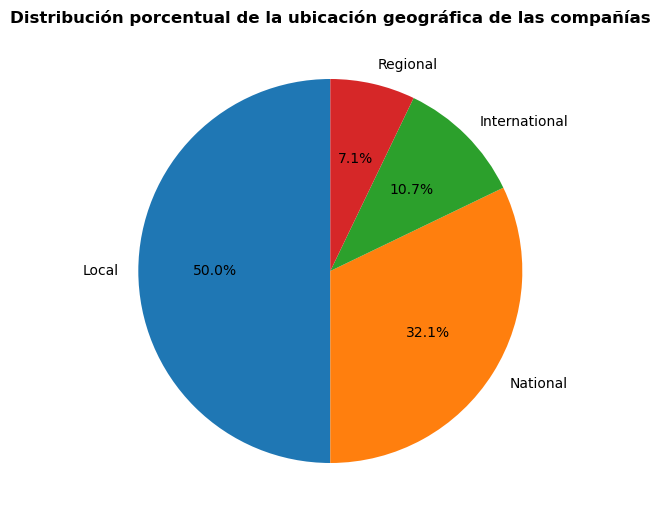

In [92]:
fig_torta = plt.figure() 
ax = fig_torta.add_axes([0,0,1,1])
plt.pie(tabla_freq["Freq. Rel."], labels=tabla_freq["4 Geographic reach location:"],autopct='%1.1f%%',startangle=90)
plt.title("Distribución porcentual de la ubicación geográfica de las compañías", fontweight='bold')
plt.show()

In [ ]:
###

In [ ]:
df_univariado['3 Age of the company:'].describe()

count    28.000000
mean     19.142857
std      12.270755
min       5.000000
25%       7.750000
50%      17.500000
75%      25.500000
max      47.000000
Name: 3 Age of the company:, dtype: float64

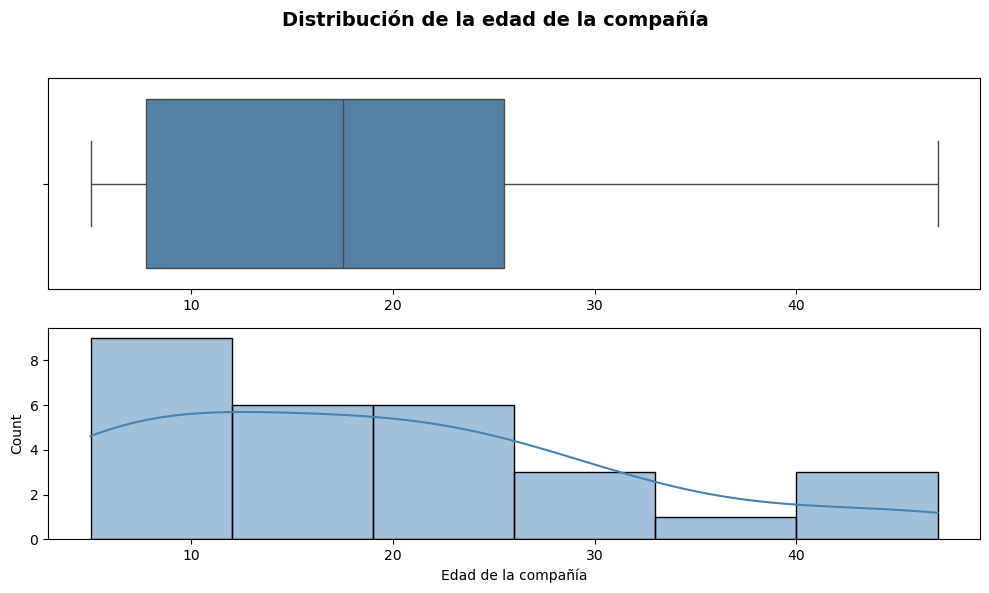

In [ ]:
# Crear figura con dos subgráficos (uno para boxplot y otro para histograma)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.suptitle("Distribución de la edad de la compañía",
             fontsize=14, fontweight='bold')

# Boxplot
sns.boxplot(x=df_univariado['3 Age of the company:'], color="steelblue", ax=axs[0])
axs[0].set_xlabel("")
#axs[0].set_title("Boxplot")

# Histograma con KDE
sns.histplot(df_univariado['3 Age of the company:'], kde=True, color="steelblue", ax=axs[1])
axs[1].set_xlabel("Edad de la compañía")
#axs[1].set_title("Histograma con KDE")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el título principal
plt.show()

### Gastos en I+D

In [99]:
df_univariado.columns

Index(['1 industry/sector:', '2 company size', '3 Age of the company:',
       'Age of the company (segment)', '4 Geographic reach location:',
       '5 R&D Expenditure (Research and Development):',
       '6 new products sales:', '7 Number of patents/innovations:',
       '8 Annual growth:', '9 Last Year Sales', 'industry', 'sector'],
      dtype='object')

In [100]:
df_univariado['5 R&D Expenditure (Research and Development):'].describe()

count    2.800000e+01
mean     2.495464e+08
std      4.283261e+08
min      0.000000e+00
25%      0.000000e+00
50%      7.250000e+07
75%      1.211250e+08
max      1.424000e+09
Name: 5 R&D Expenditure (Research and Development):, dtype: float64

In [101]:
df_univariado

,1 industry/sector:,2 company size,3 Age of the company:,Age of the company (segment),4 Geographic reach location:,5 R&D Expenditure (Research and Development):,6 new products sales:,7 Number of patents/innovations:,8 Annual growth:,9 Last Year Sales,industry,sector
0,"Manufactura, Moda",Big,29,25+ years,Regional,2.000000e-02,17850000000,12,0.18,85000000000,Manufactura,Moda
2,"Servicios, Comidas y bebidas",Big,6,5-8 years,National,1.037000e+09,2835000000,8,0.24,94500000000,Servicios,Comidas y bebidas
4,"Manufactura, Moda",Big,8,5-8 years,Local,0.000000e+00,13200000000,4,0.10,110000000000,Manufactura,Moda
6,"Servicios, Transporte y logística",Medium,23,15-25 years,International,1.200000e+09,4800000000,6,0.15,13450000000,Servicios,Transporte y logística
8,"Servicios, Tecnología",Medium,25,15-25 years,National,9.625000e+08,3850000000,4,0.08,19250000000,Servicios,Tecnología
10,"Manufactura, Construcción",Medium,30,25+ years,National,1.424000e+09,17800000000,4,0.26,71200000000,Manufactura,Construcción
12,"Manufactura, Construcción",Medium,40,25+ years,National,1.000000e+07,36.200.766.000,3,0.20,64000000000,Manufactura,Construcción
14,"Manufactura, Moda",Small,12,8-15 years,National,9.810000e+07,327000000,3,0.12,3270000000,Manufactura,Moda
16,"Comercio, Ferroelectrico",Big,24,15-25 years,International,1.200000e+08,260000000,2,0.14,110000000000,Comercio,Ferroelectrico
18,"Manufactura, Moda",Medium,21,15-25 years,Local,1.000000e+08,1476000000,3,-0.03,14760000000,Manufactura,Moda


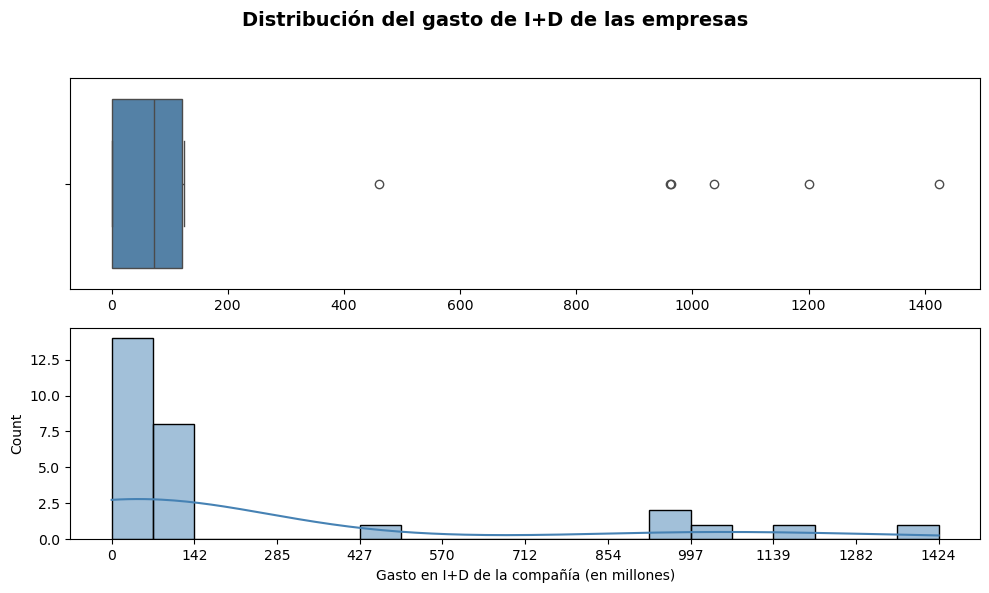

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Conversión de valores a millones
#df_univariado["5 R&D Expenditure (Research and Development):"] = df_univariado["5 R&D Expenditure (Research and Development):"].astype(int)
#df_univariado['R&D Expenditure (Research and Development) en millones'] = df_univariado['5 R&D Expenditure (Research and Development):'] / 1_000_000

# Crear figura
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.suptitle("Distribución del gasto de I+D de las empresas", fontsize=14, fontweight='bold')

# Boxplot
sns.boxplot(
    x=df_univariado['R&D Expenditure (Research and Development) en millones'],
    color="steelblue",
    ax=axs[0]
)
axs[0].set_xlabel("")

# Histograma con KDE
sns.histplot(
    df_univariado['R&D Expenditure (Research and Development) en millones'],
    kde=True,
    color="steelblue",
    ax=axs[1],
    bins=20  # puedes aumentar este número si quieres más barras
)

# Ajustar ticks en el eje X del histograma
min_val = df_univariado['R&D Expenditure (Research and Development) en millones'].min()
max_val = df_univariado['R&D Expenditure (Research and Development) en millones'].max()
step = (max_val - min_val) / 10
axs[1].set_xticks(np.arange(min_val, max_val + step, step))
axs[1].set_xlabel("Gasto en I+D de la compañía (en millones)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Ventas

In [112]:
df_univariado['6 new products sales:'].describe()

count    2.800000e+01
mean     4.657911e+09
std      7.936572e+09
min      0.000000e+00
25%      9.412500e+07
50%      2.118000e+09
75%      4.598438e+09
max      3.620077e+10
Name: 6 new products sales:, dtype: float64

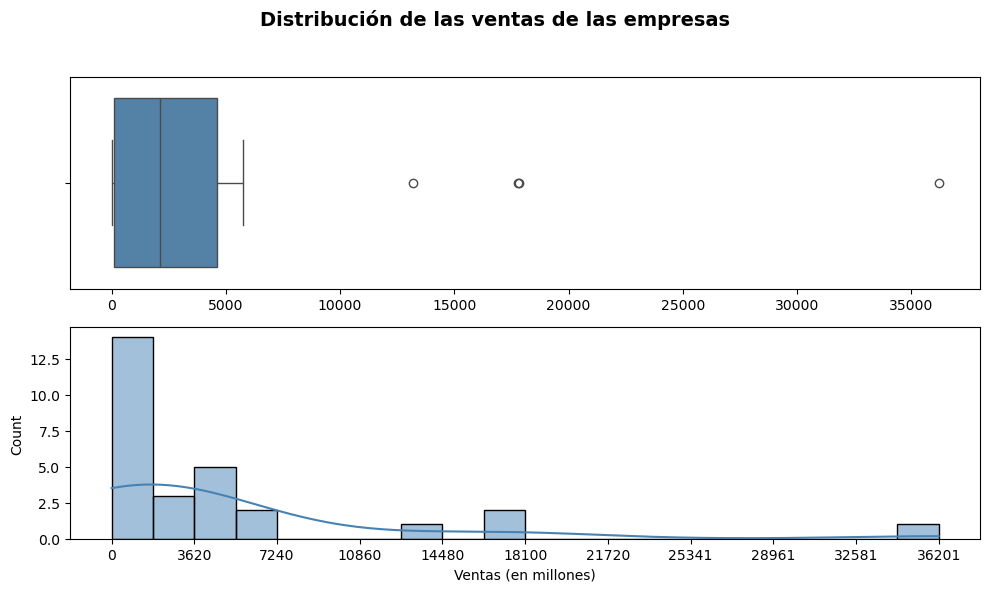

In [116]:
# Conversión de valores a millones
df_univariado['Ventas'] = df_univariado['6 new products sales:'] / 1_000_000

# Crear figura
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.suptitle("Distribución de las ventas de las empresas", fontsize=14, fontweight='bold')

# Boxplot
sns.boxplot(
    x=df_univariado['Ventas'],
    color="steelblue",
    ax=axs[0]
)
axs[0].set_xlabel("")

# Histograma con KDE
sns.histplot(
    df_univariado['Ventas'],
    kde=True,
    color="steelblue",
    ax=axs[1],
    bins=20  # puedes aumentar este número si quieres más barras
)

# Ajustar ticks en el eje X del histograma
min_val = df_univariado['Ventas'].min()
max_val = df_univariado['Ventas'].max()
step = (max_val - min_val) / 10
axs[1].set_xticks(np.arange(min_val, max_val + step, step))
axs[1].set_xlabel("Ventas (en millones)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
df_univariado.columns

Index(['1 industry/sector:', '2 company size', '3 Age of the company:',
       'Age of the company (segment)', '4 Geographic reach location:',
       '5 R&D Expenditure (Research and Development):',
       '6 new products sales:', '7 Number of patents/innovations:',
       '8 Annual growth:', '9 Last Year Sales', 'industry', 'sector'],
      dtype='object')

In [ ]:
df_univariado['5 R&D Expenditure (Research and Development):'].describe()

count    2.800000e+01
mean     2.495464e+08
std      4.283261e+08
min      0.000000e+00
25%      0.000000e+00
50%      7.250000e+07
75%      1.211250e+08
max      1.424000e+09
Name: 5 R&D Expenditure (Research and Development):, dtype: float64

In [ ]:
df_univariado

,1 industry/sector:,2 company size,3 Age of the company:,Age of the company (segment),4 Geographic reach location:,5 R&D Expenditure (Research and Development):,6 new products sales:,7 Number of patents/innovations:,8 Annual growth:,9 Last Year Sales,industry,sector
0,"Manufactura, Moda",Big,29,25+ years,Regional,2.000000e-02,17850000000,12,0.18,85000000000,Manufactura,Moda
2,"Servicios, Comidas y bebidas",Big,6,5-8 years,National,1.037000e+09,2835000000,8,0.24,94500000000,Servicios,Comidas y bebidas
4,"Manufactura, Moda",Big,8,5-8 years,Local,0.000000e+00,13200000000,4,0.10,110000000000,Manufactura,Moda
6,"Servicios, Transporte y logística",Medium,23,15-25 years,International,1.200000e+09,4800000000,6,0.15,13450000000,Servicios,Transporte y logística
8,"Servicios, Tecnología",Medium,25,15-25 years,National,9.625000e+08,3850000000,4,0.08,19250000000,Servicios,Tecnología
10,"Manufactura, Construcción",Medium,30,25+ years,National,1.424000e+09,17800000000,4,0.26,71200000000,Manufactura,Construcción
12,"Manufactura, Construcción",Medium,40,25+ years,National,1.000000e+07,36.200.766.000,3,0.20,64000000000,Manufactura,Construcción
14,"Manufactura, Moda",Small,12,8-15 years,National,9.810000e+07,327000000,3,0.12,3270000000,Manufactura,Moda
16,"Comercio, Ferroelectrico",Big,24,15-25 years,International,1.200000e+08,260000000,2,0.14,110000000000,Comercio,Ferroelectrico
18,"Manufactura, Moda",Medium,21,15-25 years,Local,1.000000e+08,1476000000,3,-0.03,14760000000,Manufactura,Moda


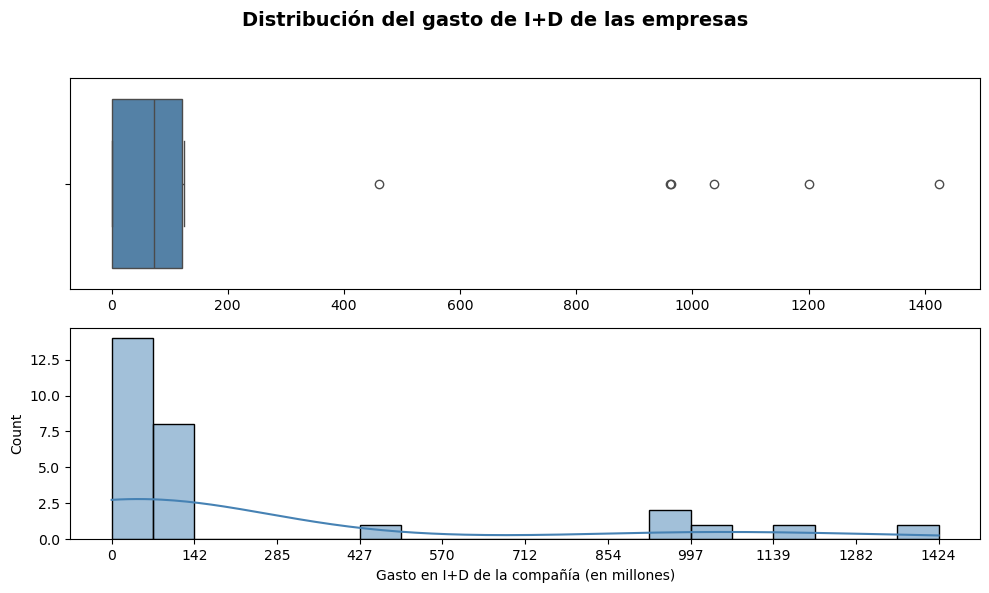

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Conversión de valores a millones
#df_univariado["5 R&D Expenditure (Research and Development):"] = df_univariado["5 R&D Expenditure (Research and Development):"].astype(int)
#df_univariado['R&D Expenditure (Research and Development) en millones'] = df_univariado['5 R&D Expenditure (Research and Development):'] / 1_000_000

# Crear figura
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.suptitle("Distribución del gasto de I+D de las empresas", fontsize=14, fontweight='bold')

# Boxplot
sns.boxplot(
    x=df_univariado['R&D Expenditure (Research and Development) en millones'],
    color="steelblue",
    ax=axs[0]
)
axs[0].set_xlabel("")

# Histograma con KDE
sns.histplot(
    df_univariado['R&D Expenditure (Research and Development) en millones'],
    kde=True,
    color="steelblue",
    ax=axs[1],
    bins=20  # puedes aumentar este número si quieres más barras
)

# Ajustar ticks en el eje X del histograma
min_val = df_univariado['R&D Expenditure (Research and Development) en millones'].min()
max_val = df_univariado['R&D Expenditure (Research and Development) en millones'].max()
step = (max_val - min_val) / 10
axs[1].set_xticks(np.arange(min_val, max_val + step, step))
axs[1].set_xlabel("Gasto en I+D de la compañía (en millones)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Index(['1 industry/sector:', '2 company size', '3 Age of the company:',
       'Age of the company (segment)', '4 Geographic reach location:',
       '5 R&D Expenditure (Research and Development):',
       '6 new products sales:', '7 Number of patents/innovations:',
       '8 Annual growth:', '9 Last Year Sales', 'industry', 'sector'],
      dtype='object')

In [25]:
df_univariado.dtypes

1 industry/sector:                                object
2 company size                                    object
3 Age of the company:                              int64
Age of the company (segment)                      object
4 Geographic reach location:                      object
5 R&D Expenditure (Research and Development):    float64
6 new products sales:                             object
7 Number of patents/innovations:                   int64
8 Annual growth:                                 float64
9 Last Year Sales                                  int64
dtype: object

In [32]:
# Reemplazo de puntos y $ por nada en las columnas de ventas y costos
df_univariado['6 new products sales:'] = df_univariado['6 new products sales:'].astype(str).str.replace('.', '', regex=False)
df_univariado['6 new products sales:'] = df_univariado['6 new products sales:'].replace('$', '', regex=False)
df_univariado

,1 industry/sector:,2 company size,3 Age of the company:,Age of the company (segment),4 Geographic reach location:,5 R&D Expenditure (Research and Development):,6 new products sales:,7 Number of patents/innovations:,8 Annual growth:,9 Last Year Sales
0,"Manufactura, Moda",Big,29,25+ years,Regional,2.000000e-02,17850000000,12,0.18,85000000000
2,"Servicios, Comidas y bebidas",Big,6,5-8 years,National,1.037000e+09,2835000000,8,0.24,94500000000
4,"Manufactura, Moda",Big,8,5-8 years,Local,0.000000e+00,13200000000,4,0.10,110000000000
6,"Servicios, Transporte y logística",Medium,23,15-25 years,International,1.200000e+09,4800000000,6,0.15,13450000000
8,"Servicios, Tecnología",Medium,25,15-25 years,National,9.625000e+08,3850000000,4,0.08,19250000000
10,"Manufactura, Construcción",Medium,30,25+ years,National,1.424000e+09,17800000000,4,0.26,71200000000
12,"Manufactura, Construcción",Medium,40,25+ years,National,1.000000e+07,36200766000,3,0.20,64000000000
14,"Manufactura, Moda",Small,12,8-15 years,National,9.810000e+07,327000000,3,0.12,3270000000
16,"Comercio, Ferroelectrico",Big,24,15-25 years,International,1.200000e+08,260000000,2,0.14,110000000000
18,"Manufactura, Moda",Medium,21,15-25 years,Local,1.000000e+08,1476000000,3,-0.03,14760000000


In [33]:
df_univariado.to_excel("df_univariado.xlsx", index=False)

In [ ]:
# Cambiar tipo de variable de new product sales a integer

df_univariado['6 new products sales:'] = df_univariado['6 new products sales:'].astype(int)
df_univariado

OverflowError: Python int too large to convert to C long

In [29]:
df_univariado

,1 industry/sector:,2 company size,3 Age of the company:,Age of the company (segment),4 Geographic reach location:,5 R&D Expenditure (Research and Development):,6 new products sales:,7 Number of patents/innovations:,8 Annual growth:,9 Last Year Sales
0,"Manufactura, Moda",Big,29,25+ years,Regional,2.000000e-02,17850000000,12,0.18,85000000000
2,"Servicios, Comidas y bebidas",Big,6,5-8 years,National,1.037000e+09,2835000000,8,0.24,94500000000
4,"Manufactura, Moda",Big,8,5-8 years,Local,0.000000e+00,13200000000,4,0.10,110000000000
6,"Servicios, Transporte y logística",Medium,23,15-25 years,International,1.200000e+09,4800000000,6,0.15,13450000000
8,"Servicios, Tecnología",Medium,25,15-25 years,National,9.625000e+08,3850000000,4,0.08,19250000000
10,"Manufactura, Construcción",Medium,30,25+ years,National,1.424000e+09,17800000000,4,0.26,71200000000
12,"Manufactura, Construcción",Medium,40,25+ years,National,1.000000e+07,36.200.766.000,3,0.20,64000000000
14,"Manufactura, Moda",Small,12,8-15 years,National,9.810000e+07,327000000,3,0.12,3270000000
16,"Comercio, Ferroelectrico",Big,24,15-25 years,International,1.200000e+08,260000000,2,0.14,110000000000
18,"Manufactura, Moda",Medium,21,15-25 years,Local,1.000000e+08,1476000000,3,-0.03,14760000000


### Industry

# **Sección 2 - Análisis de Componentes Principales & Clustering**